In [1]:
from pandas import read_csv, concat

from matplotlib import pyplot as plt

from os import listdir
from os.path import join

In [2]:
DATA_DIR = join("..", "data", "other")
print(f"All data are loaded from {DATA_DIR}")

All data are loaded from ..\data\other


In [21]:
def load_data_from_dir(dir_name, *args, **kwargs):
    """This function will load data from multiple csv files in a data dir.

    Besides dir_name, you can pass arguments and keyword arguments to
    the pandas.read_csv function, by adding them to this function's
    parameter list. The function will always return a pandas.DataFrame.
    To succeed, you need to make sure that the schema of all contained
    csv files is equal (i.e. all must have the same columns in the same
    order).

    The function will add an additional column to the pandas.DataFrame
    containing the name of the file, the respective row has been loaded
    from. The column is called "origin" (e.g. "1.csv")

    :param dir_name: The directory name to load from
    :return: pandas.DataFrame with data
    """
    first = True
    for file in listdir(dir_name):
        temp_file_path = join(dir_name, file)
        if first:
            data = read_csv(temp_file_path, *args, **kwargs)
            data["origin"] = str(temp_file_path)
        else:
            temp_data = read_csv(temp_file_path, *args, **kwargs)
            temp_data["origin"] = str(temp_file_path)
            data = concat([data, temp_data])
        first = False
    return data.sort_index()

## Load the Data

In [22]:
data = load_data_from_dir(
    # Original arguments
    dir_name=DATA_DIR,

    # Args for pandas.read_csv()
    sep=";",
    parse_dates=[0],
    index_col=0
)

## Visualize Columns of Data (using the first csv file as an Example)

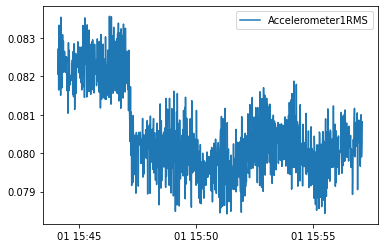

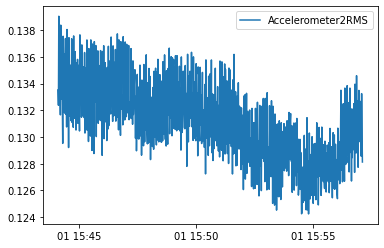

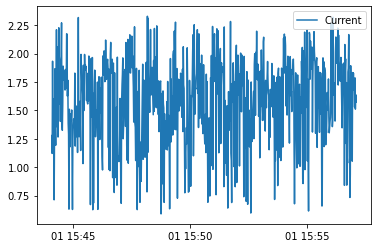

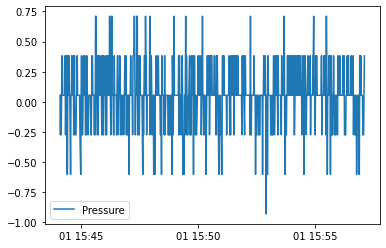

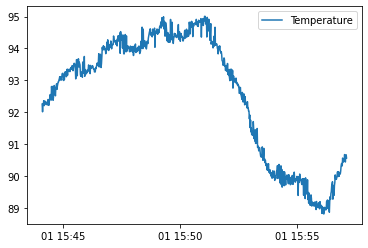

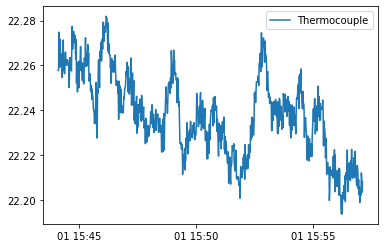

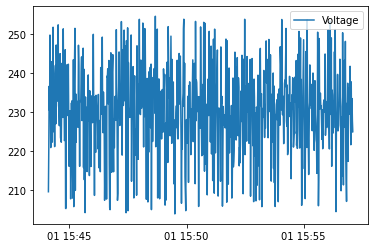

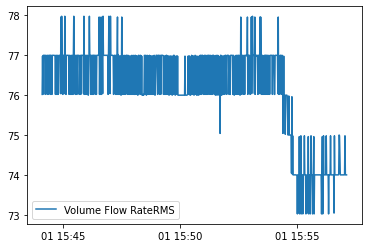

In [29]:
for column in x_colums:
    plt.plot(data.loc[data.origin=="..\\data\\other\\1.csv"][column], label=column)
    plt.legend(loc=0)
    plt.show()

## Explore loaded Data

In [30]:
x_colums = [
    "Accelerometer1RMS",
    "Accelerometer2RMS",
    "Current",
    "Pressure",
    "Temperature",
    "Thermocouple",
    "Voltage",
    "Volume Flow RateRMS"
]

y_colums = [
    "anomaly"
]

X = data[x_colums]
y = data[y_colums]

In [31]:
print(X.shape, y.shape)

(14929, 8) (14929, 1)
